# Final Project code

## Research question

Predict use of force from other variables

## Data sources

NY Stop and Frisk Database, 2014

## Exploratory Analysis

In [1]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#read in data
df = pd.read_csv("./2014_SQF.csv")

See 2014 SQF codebook (in zip folder) for variable definitons

### Getting to know the data

In [3]:
#Getting to know the data
df.head()

,year,pct,ser_num,datestop,timestop,city,sex,race,dob,age,...,explnstp,repcmd,revcmd,offunif,offverb,officrid,offshld,radio,recstat,linecm
0,2014,67,15,1012014,2330,2,1.0,1.0,12311900,18.0,...,1,186,186,0,0,0,1,0,1,1
1,2014,7,26,1032014,1530,1,1.0,1.0,12311900,31.0,...,1,863,863,0,1,0,1,0,1,1
2,2014,84,52,1042014,2100,2,1.0,1.0,12311900,16.0,...,1,84,84,0,1,0,1,0,0,1
3,2014,84,13,1092014,1250,2,1.0,5.0,12311900,19.0,...,1,84,84,1,0,0,0,0,1,1
4,2014,77,19,1092014,1310,2,1.0,1.0,12311900,32.0,...,1,187,187,0,1,0,1,0,1,1


In [4]:
#list all of the variables
# SW: Nice!
for x in df.columns.values:
    print x

year
pct
ser_num
datestop
timestop
city
sex
race
dob
age
height
weight
haircolr
eyecolor
build
othfeatr
frisked
searched
contrabn
pistol
riflshot
asltweap
knifcuti
machgun
othrweap
arstmade
arstoffn
sumissue
sumoffen
crimsusp
detailcm
perobs
perstop
pf_hands
pf_wall
pf_grnd
pf_drwep
pf_ptwep
pf_baton
pf_hcuff
pf_pepsp
pf_other
cs_objcs
cs_descr
cs_casng
cs_lkout
cs_cloth
cs_drgtr
cs_furtv
cs_vcrim
cs_bulge
cs_other
rf_vcrim
rf_othsw
rf_attir
rf_vcact
rf_rfcmp
rf_verbl
rf_knowl
rf_furt
rf_bulg
sb_hdobj
sb_outln
sb_admis
sb_other
ac_proxm
ac_evasv
ac_assoc
ac_cgdir
ac_incid
ac_time
ac_stsnd
ac_rept
ac_inves
ac_other
forceuse
inout
trhsloc
premname
addrnum
stname
stinter
crossst
addrpct
sector
beat
post
xcoord
ycoord
typeofid
othpers
explnstp
repcmd
revcmd
offunif
offverb
officrid
offshld
radio
recstat
linecm


In [70]:
#list dtypes (not all are shown)
df.dtypes

year                 int64
pct                  int64
ser_num              int64
datestop             int64
timestop             int64
city                 int64
sex                float64
race               float64
dob                  int64
age                float64
height               int64
weight               int64
haircolr           float64
eyecolor           float64
build              float64
othfeatr            object
frisked              int64
searched             int64
contrabn             int64
pistol             float64
riflshot           float64
asltweap           float64
knifcuti           float64
machgun            float64
othrweap           float64
arstmade             int64
arstoffn            object
sumissue             int64
sumoffen            object
crimsusp            object
                 ...      
ac_inves           float64
ac_other           float64
forceuse           float64
inout                int64
trhsloc              int64
premname            object
a

In [72]:
df.describe()

C:\Users\Samantha\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,pct,ser_num,datestop,timestop,city,sex,race,dob,age,...,explnstp,repcmd,revcmd,offunif,offverb,officrid,offshld,radio,recstat,linecm
count,45787.0,45787.000000,45787.000000,4.578700e+04,45787.000000,45787.000000,45393.000000,44748.000000,4.578700e+04,45680.000000,...,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.0
mean,2014.0,75.626357,492.903728,5.876784e+06,1390.000044,2.900430,0.936885,2.087736,1.225082e+07,28.157312,...,0.998515,220.804508,222.486994,0.541726,0.318322,0.019416,0.453797,0.333151,0.569223,1.0
std,0.0,34.368057,440.163077,3.238191e+06,776.042494,1.282295,0.243173,1.329921,6.788148e+05,12.616089,...,0.038509,276.180674,276.395506,0.498261,0.465830,0.137983,0.497866,0.471345,0.495190,0.0
min,2014.0,1.000000,1.000000,1.012014e+06,0.000000,1.000000,0.000000,1.000000,1.011979e+06,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2014.0,44.000000,156.000000,3.142014e+06,815.000000,2.000000,NaN,NaN,1.231190e+07,NaN,...,1.000000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2014.0,78.000000,360.000000,5.282014e+06,1605.000000,3.000000,NaN,NaN,1.231190e+07,NaN,...,1.000000,106.000000,106.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,2014.0,106.000000,705.000000,8.282014e+06,2050.000000,4.000000,NaN,NaN,1.231190e+07,NaN,...,1.000000,164.000000,165.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0
max,2014.0,123.000000,2285.000000,1.231201e+07,2359.000000,5.000000,1.000000,6.000000,1.231200e+07,565.000000,...,1.000000,879.000000,879.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [5]:
df.shape

(45787, 101)

The original data set has 45787 observations (rows) and 101 variables (columns)

### Drop variables, cases, and fill missing values

In [75]:
# Variables to drop:
    
# Year (all 2014 data)
# DOB (all values are '12311900', which is false)
# othfeatr - text string
# arstoffn - text string, no significant grouping
# sumoffen - string
# crimsusp - string
# perobs - not sure its accurate
# perstop - not sure its accurate
# age??
# forceuse - LOTS of missing data
# .....more to come

In [ ]:
#dropNA for demographics (sex, race), since those are important variables

### Convert datestop to datetime

In [62]:
df['date'] = pd.to_datetime(df['datestop'], format='%m%d%Y')
#figure out how to write this function so it reads the datestop as mmddyyyy
# SW: looks like you did it!

In [66]:
df['date'].head()

0   2014-10-01
1   2014-10-03
2   2014-10-04
3   2014-10-09
4   2014-10-09
Name: date, dtype: datetime64[ns]

### Histograms of select variables

**Let's dig into the age variable to see whats going on in the raw data**

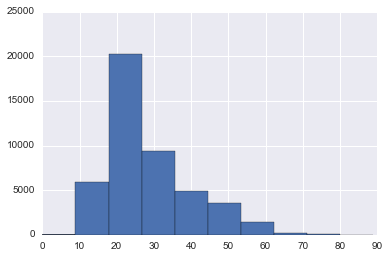

In [48]:
df_age = df[df.age < 90]
df_age['age'].hist(bins=10)

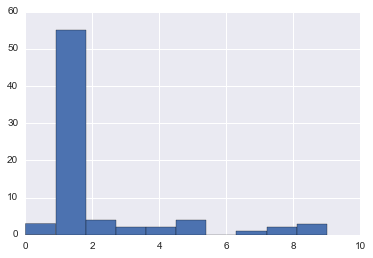

In [49]:
df_young = df[df.age < 10]
df_young['age'].hist()

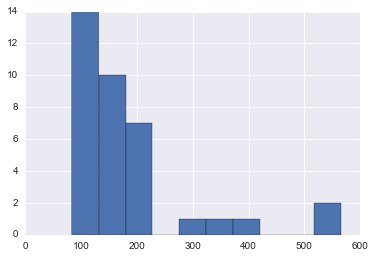

In [50]:
df_old = df[df.age > 80]
df_old['age'].hist()

In [51]:
#looks like some of the age data is likely wrong (age >= 100 is unlikely)

# USE THIS CODE TO CREATE DUMMY VARIABLES FOR INVALID AGES
# df['age_80'] = df.age > 80
##how to create a dummy variable with age = invalid

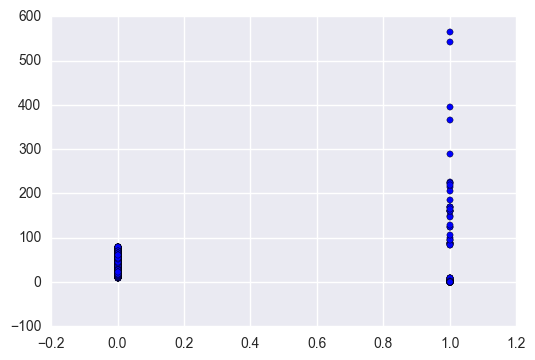

In [11]:
# SW: Trick for creating new columns where you have complicated logic:

def age_invalid(row):
    return row['age'] > 80 or row['age'] < 10

df['age_invalid'] = df.apply(lambda x: age_invalid(x), axis=1)

# Basically, I'm defining a new variable as a function of each row

plt.scatter(df['age_invalid'], df['age'])

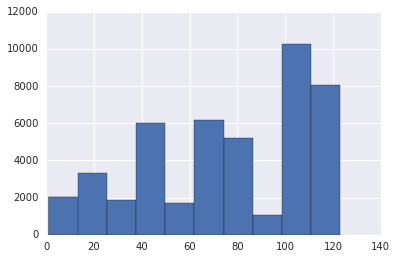

In [40]:
df['pct'].hist()
#precints

precints have very different SQF quantities

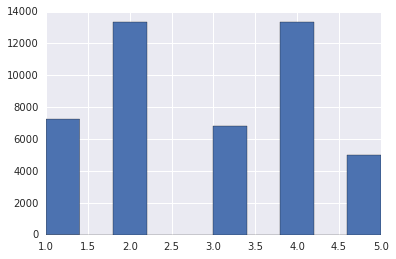

In [41]:
df['city'].hist()

most stops are in Brooklyn and Queens

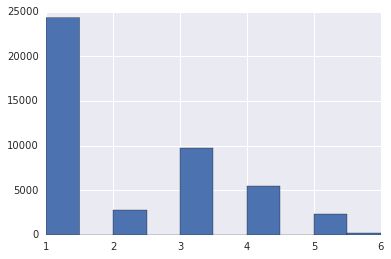

In [43]:
df['race'].hist()

In [45]:
# 1=black, 2=black hispanic, 3=white hispanic, 4=white, 5=Asian/Pacific Islander, 6=Am Indian/Native

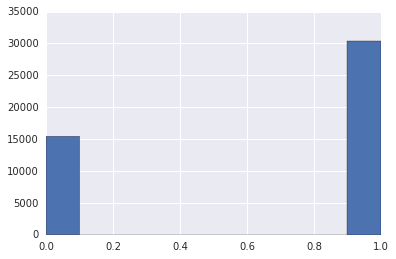

In [51]:
df['frisked'].hist()
#was suspect frisked?

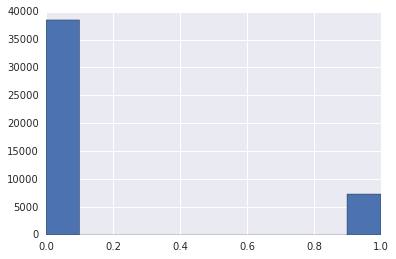

In [52]:
df['searched'].hist()
#was suspect searched?

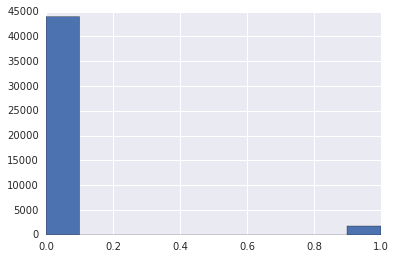

In [53]:
df['contrabn'].hist()
#was contraband found on suspect?

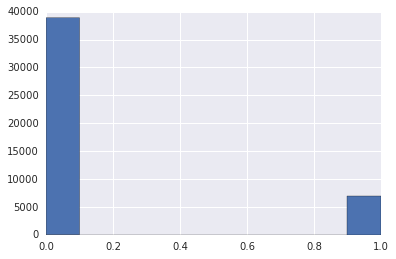

In [54]:
df['arstmade'].hist()
#was an arrest made?

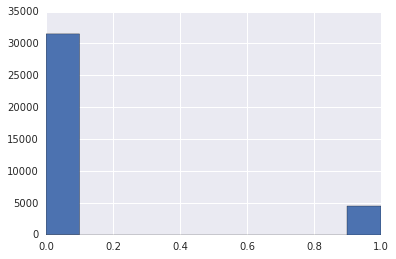

In [58]:
df['pf_hcuff'].hist()
#physical force used by officer - handcuffs

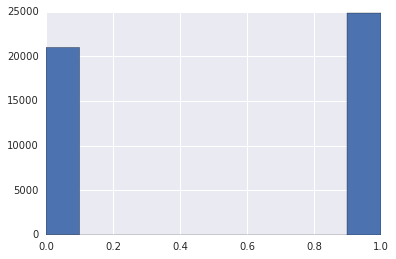

In [64]:
df['offunif'].hist()
#was officer in uniform?

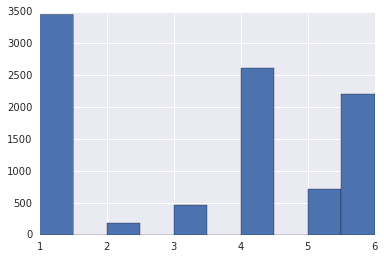

In [66]:
df['forceuse'].hist()
#reason for use of force
# 1=defense of other, 2= defense of self, 3=overcome resistance, 4=other, 5= suspected flight, 6=suspected weapon

### Correlation matrix

In [76]:
df.corr()
#re-run this with only selected variables

,year,pct,ser_num,datestop,timestop,city,sex,race,dob,age,...,explnstp,repcmd,revcmd,offunif,offverb,officrid,offshld,radio,recstat,linecm
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct,NaN,1.000000,0.369014,-0.026235,-0.000736,0.841437,0.041353,0.121578,-0.055436,-0.082495,...,0.021380,-0.284297,-0.278100,-0.099839,0.093527,-0.096136,0.102892,-0.027780,-0.209132,NaN
ser_num,NaN,0.369014,1.000000,0.624174,-0.006487,0.388395,0.028251,-0.003703,-0.127960,-0.057940,...,0.009886,-0.145861,-0.138392,-0.077481,0.094149,-0.047502,0.077166,-0.139517,-0.150014,NaN
datestop,NaN,-0.026235,0.624174,1.000000,-0.045894,-0.009584,0.010997,-0.001633,-0.145670,-0.013320,...,0.002481,-0.025920,-0.024789,0.003781,-0.007685,0.000840,-0.006127,0.003496,-0.012249,NaN
timestop,NaN,-0.000736,-0.006487,-0.045894,1.000000,0.004159,-0.006913,-0.040793,0.006740,-0.021786,...,0.009580,0.063991,0.065966,-0.020935,0.010865,0.003360,0.019548,-0.050617,0.010139,NaN
city,NaN,0.841437,0.388395,-0.009584,0.004159,1.000000,0.036696,0.155048,-0.057430,-0.098343,...,0.017351,-0.278191,-0.271783,-0.063318,0.076975,-0.078814,0.065817,-0.045212,-0.264846,NaN
sex,NaN,0.041353,0.028251,0.010997,-0.006913,0.036696,1.000000,-0.018805,-0.000125,-0.017314,...,-0.005037,-0.077822,-0.078794,-0.081037,0.062898,0.006383,0.080043,-0.017458,-0.029760,NaN
race,NaN,0.121578,-0.003703,-0.001633,-0.040793,0.155048,-0.018805,1.000000,-0.045740,0.039121,...,0.014429,-0.114237,-0.115528,-0.018302,0.045443,0.022742,0.019622,0.078469,-0.111021,NaN
dob,NaN,-0.055436,-0.127960,-0.145670,0.006740,-0.057430,-0.000125,-0.045740,1.000000,-0.006308,...,-0.003470,0.025270,0.026471,0.012328,-0.016845,-0.008182,-0.010955,-0.005969,0.015969,NaN
age,NaN,-0.082495,-0.057940,-0.013320,-0.021786,-0.098343,-0.017314,0.039121,-0.006308,1.000000,...,-0.004646,0.063521,0.064462,0.042378,-0.019098,0.025552,-0.041964,0.017236,0.031901,NaN


### Plots

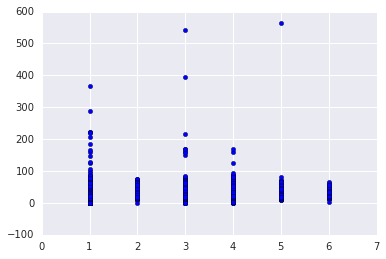

In [57]:
plt.scatter(df['race'],df['age'])
#not very useful unless we are able to clean the "age" variable
# SW: see above

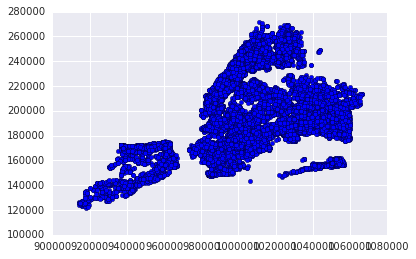

In [63]:
plt.scatter(df['xcoord'],df['ycoord'])
#not sure if this is useful -- plot of the stops by x and y coordinates

In [33]:
#bar plots

# df.plot(kind='bar')
# plt.show()

# df.plot(kind='bar', yerr=True)
# plt.show()

### NEXT STEPS:

SW: I think I was suggesting a lot of complicated stuff for you to do. Let's start simple and then build toward the more complex stuff.

First, try dropping values with missing race, invalid age, and then try to throw a few variables (race, age, a dummy for if age was missing or valid, etc.) into a Logistic Regression model and see if you can get some accuracy. 

Maybe even before that, go through the 100 variables and choose ~10 that you think might be good predictors for your model. Then, just g

In [67]:
### SAM'S NOTES FOR NEXT STEPS: 

# Find missing values, replace them with "unknown" variable, or impute?
# For missing race, can I do k-nearest neighbors to determine what likely race is?
# Clean up birthday, age variables (possibly delete altogether)
# get rid of some variables (i.e., text strings)
# combine some categories if other studies did the same (i.e., combine black and black hispanic, as that was the methodology for Fryer paper)
# roll all of the "physical force used by officer" categories together (add a new new column to df with sum)
# re-create correlation matrix with less variables
# Look into distribution of variable "time" (resample by hour)